<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.
 

### Input Layer: 
Whatever inputs a neural network is receiving
### Hidden Layer:
Layers that transform and do calculations data coming from other hidden layers or the input layers
### Output Layer:
The final output of the neural network
### Neuron:
A single unit that takes inputs, calculates, and outputs a value
### Weight:
Values that neurons use to calculate its new value
### Activation Function:
Functions that define the output of a neuron
### Node Map:
A visual representation of the neural netowrk
### Perceptron:
Various algorithms used for training binary classifiers

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

A neural network is fed data through the input layers, and goes through various neurons in hidden layers to create an output value. Such hidden layers can have weights, which are values that data can be multiplied by, or biases which work practically like an intercept. Connections between neurons and layers can be turned on thru activation layers, which are functions that will return certain values from the neurons. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
from sklearn.metrics import accuracy_score

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    s_x = sigmoid(x)
    return s_x * (1 - s_x)

def predict(X, y, iters=100):
    errs = []
    weights = np.zeros((X.shape[1], 1))
    for _ in range(iters):
        w_sum = np.dot(X, weights)
        act_out = sigmoid(w_sum)
        err = y - act_out
        adjs = err * sigmoid_derivative(act_out)
        weights = weights + np.dot(X.T, adjs)
    return act_out[-1]

In [467]:
X = np.array(df.iloc[0:, [0, 1]])
y = np.array(df.iloc[0:, 2])
predict(X, y)

array([0.99793137, 0.99793137, 0.99793137, 0.00143655])

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [51]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
import numpy as np
import matplotlib.pyplot as plt

feats = list(diabetes)[:-1]

X = diabetes.iloc[0:, 0:-1].values
y = diabetes.iloc[0:, -1].values

In [0]:
class Perceptron(object):
    def __init__(self, its=10):
        self.its = its
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1 - sx)

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.its):
            error = 0
            for x_i, y_i in zip(X, y):
                err = y_i - self.predict(x_i)
                self.weights[1:] += err * x_i
                self.weights[0]  += err
                error += int(err != 0.0)
            self.errors.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) <= 0.5, 0, 1)

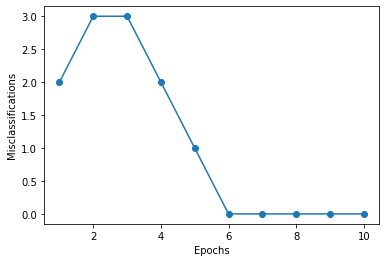

In [457]:
pn = Perceptron(10)
pn.fit(X, y)
print()

plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?